In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta       
import seaborn as sns
from sklearn.model_selection import train_test_split

# Get an idea of what the data we're working with looks like and Data prepocessing

In [26]:
df = pd.read_csv('ENB2012_data.csv')
df


# { X1 : Relative Compactness }
# { X2 : Surface Area }
# { X3 :Wall Area }
# { X4 : Roof Area }
# { X5 :Overall Height }
# { X6 :Orientation }
# { X7 :Glazing Area }
# { X8 :Glazing Area Distribution }

# { y1 : Heating Load }
# { y2 : Cooling Load }






,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 0


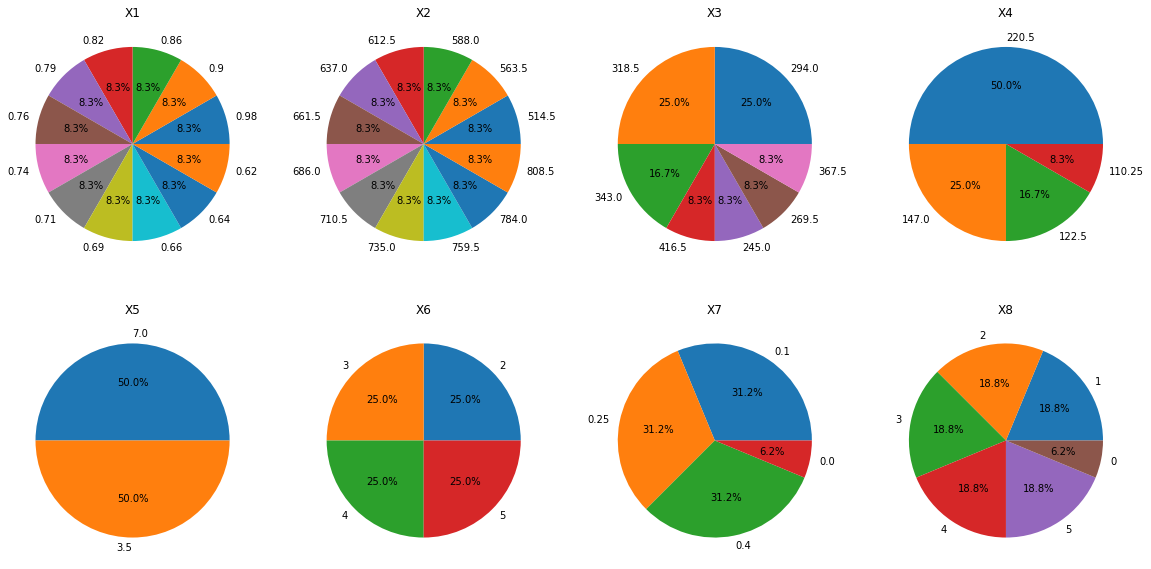

In [27]:
# Get the names of the 8 columns
columns = df.columns

# Create a subplot with 8 plots, one for each column
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

row = 0
col = 0
# Loop through the 8 columns
for i, column in enumerate(columns):
  # Calculate the class distribution for each column
  class_counts = df[column].value_counts()
  n_instances = 768
  class_percentages = (class_counts / n_instances)
  
  # Get the row and column index of the current plot
  if( col > 3):
    row += 1
    col = 0

  print(row,col)
  
  # Add the pie chart to the subplot
  try :
    ax[row, col].pie(class_percentages*100, labels=class_percentages.index, autopct='%1.1f%%')
    ax[row, col].set_title(column)
    col +=1
  except:
    continue
  
# Show the subplot
plt.show()

In [28]:
def check_clean_data(df):
    print(df.isnull().sum()) #check for null values
    print("\n(Rows, Columns)", df.shape) #check for missing values

    print("\nCheck for empty values")
    print(df[df.eq("?").any(1)]) #check for missing values
check_clean_data(df)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

(Rows, Columns) (768, 10)

Check for empty values
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: []


In [29]:
def standardize_data(df):
    feature_cols = [col for col in df.columns if col not in ['Y1', 'Y2']]
    for col in feature_cols:
        df[col] = (df[col] - df[col].mean())/df[col].std()
    return df
df = standardize_data(df)
df


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-1.340767,-1.759300,-1.813393,15.55,21.33
1,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-0.446922,-1.759300,-1.813393,15.55,21.33
2,2.040447,-1.784712,-0.561586,-1.469119,0.999349,0.446922,-1.759300,-1.813393,15.55,21.33
3,2.040447,-1.784712,-0.561586,-1.469119,0.999349,1.340767,-1.759300,-1.813393,15.55,21.33
4,1.284142,-1.228438,0.000000,-1.197897,0.999349,-1.340767,-1.759300,-1.813393,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,-1.173848,1.274794,0.561586,0.971879,-0.999349,1.340767,1.243239,1.410417,17.88,21.40
764,-1.362924,1.552931,1.123171,0.971879,-0.999349,-1.340767,1.243239,1.410417,16.54,16.88
765,-1.362924,1.552931,1.123171,0.971879,-0.999349,-0.446922,1.243239,1.410417,16.44,17.11
766,-1.362924,1.552931,1.123171,0.971879,-0.999349,0.446922,1.243239,1.410417,16.48,16.61


In [30]:
def df_stats(df):
    print(df.describe().round(6))
df_stats(df)

               X1          X2          X3          X4          X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.000000   -0.000000    0.000000    0.000000    0.000000    0.000000   
std      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
min     -1.362924   -1.784712   -1.684757   -1.469119   -0.999349   -1.340767   
25%     -0.772061   -0.741698   -0.561586   -0.791064   -0.999349   -0.670384   
50%     -0.133929    0.023178    0.000000    0.158213    0.000000    0.000000   
75%      0.622376    0.788055    0.561586    0.971879    0.999349    0.670384   
max      2.040447    1.552931    2.246342    0.971879    0.999349    1.340767   

               X7          X8          Y1          Y2  
count  768.000000  768.000000  768.000000  768.000000  
mean     0.000000   -0.000000   22.307201   24.587760  
std      1.000000    1.000000   10.090196    9.513306  
min     -1.759300   -1.813393    6.010000   10

In [31]:
# sns.pairplot(df)

Finding Correlation between features

In [32]:
corr_df = df.corr().round(6)
corr_df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000,-0.991901,-0.203782,-0.868823,0.827747,-0.000000,-0.000000,-0.000000,0.622272,0.634339
X2,-0.991901,1.000000,0.195502,0.880720,-0.858148,0.000000,-0.000000,-0.000000,-0.658120,-0.672999
X3,-0.203782,0.195502,1.000000,-0.292316,0.280976,0.000000,0.000000,0.000000,0.455671,0.427117
X4,-0.868823,0.880720,-0.292316,1.000000,-0.972512,0.000000,0.000000,-0.000000,-0.861828,-0.862547
X5,0.827747,-0.858148,0.280976,-0.972512,1.000000,-0.000000,-0.000000,-0.000000,0.889431,0.895785
X6,-0.000000,0.000000,0.000000,0.000000,-0.000000,1.000000,0.000000,0.000000,-0.002587,0.014290
X7,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.212964,0.269841,0.207505
X8,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.212964,1.000000,0.087368,0.050525
Y1,0.622272,-0.658120,0.455671,-0.861828,0.889431,-0.002587,0.269841,0.087368,1.000000,0.975862
Y2,0.634339,-0.672999,0.427117,-0.862547,0.895785,0.014290,0.207505,0.050525,0.975862,1.000000


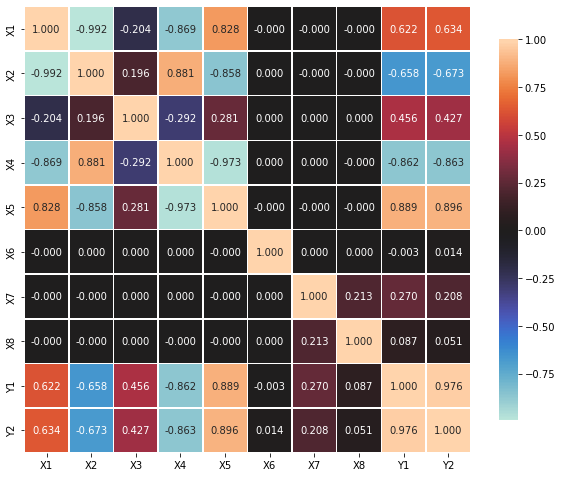

In [33]:
#code taken from https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4#:~:text=Positive%20Correlation%3A%20means%20that%20if,they%20have%20a%20linear%20relationship.

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.3f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()

correlation_heatmap(df)

# Starting Simper Linear Regression

In [34]:
features = df.copy()
features = features.drop(columns=["Y1", "Y2"])


In [35]:
labels = df.copy()
labels = labels.drop(columns=["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"])

Convert to numpy

In [36]:

features = features.to_numpy()
labels = labels.to_numpy()


In [37]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
    
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([np.ones(N),x])    #add bias by adding a constant feature of value 1
        # self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        self.w = np.linalg.inv(x.T @ x)@x.T@y  
        return self, self.w
    
    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([np.ones(N),x])
        yh = x@self.w                             #predict the y values
        return yh


Experiments:
We first start by defining a function to split the data into training and test sets

In [38]:
def mean_squared_error(a, b):
    # Calculate the difference between the matrices
    difference = (a - b)**2
    mse = np.mean(difference)
    # Return the mean squared error
    return mse

def mean_absolute_error(a, b):
    # Calculate the absolute difference between the matrices
    difference = np.mean(np.abs(a - b))
    return difference

def r_squared(a, b):
    # Calculate the mean of the first matrix
    mean = np.mean(a)
    # Calculate the difference between the matrices and the mean of the first matrix
    difference = a - b
    mean_difference = a - mean
    # Calculate the sum of squared differences
    squared_difference = difference**2
    mean_squared_difference = mean_difference**2
    # Calculate the R-squared
    r_squared = 1 - (np.sum(squared_difference) / np.sum(mean_squared_difference))
    # Return the R-squared
    return r_squared


# print("MSE", mean_squared_error(y_test, yh))
# print("MAE", mean_absolute_error(y_test, yh))
# print("R^2", r_squared(y_test, yh))

1- Report the performance of linear regression and fully batched logistic regression. For both datasets use a 80/20
train/test split and report the performance on both training set and test set.

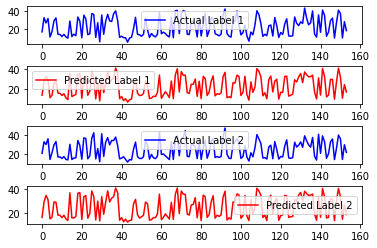

MSE for linear regression, testing set:
 12.701612954135502
MSE for linear regression, training set:
 10.985280272499581
MAE for linear regression, testing set:
 2.708145391687635
MAE for linear regression, training set:
 2.4987405102891955
R^2 for linear regression, testing set:
 0.872395791131653
R^2 for linear regression, training set:
 0.8864899826104329
Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.

Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.

W values 
 [[ 2.23407806e+01  2.46237

In [39]:
feat_train, feat_test, label_train, label_test = train_test_split(features,labels,test_size=0.2)
experiment1_lr = LinearRegression()
feat_train  = np.array(feat_train)
feat_test  = np.array(feat_test)
label_train  = np.array(label_train)
label_test  = np.array(label_test)
exp1_training, weights = experiment1_lr.fit(feat_train, label_train) #Train model
exp1_testing = exp1_training.predict(feat_test)
exp1_train_expected = exp1_training.predict(feat_train)


#Second plot


plt.subplot(4, 1, 1)
plt.plot(label_test[:, 0], color='blue', label='Actual Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(label_test[:, 1], color='blue', label='Actual Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(exp1_testing[:, 0], color='red', label='Predicted Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(exp1_testing[:, 1], color='red', label='Predicted Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.show()
#TODO: four plots, two for each dependent variable
print("MSE for linear regression, testing set:\n", mean_squared_error(label_test, exp1_testing))
print("MSE for linear regression, training set:\n", mean_squared_error(label_train, exp1_train_expected))


print("MAE for linear regression, testing set:\n", mean_absolute_error(label_test, exp1_testing))
print("MAE for linear regression, training set:\n", mean_absolute_error(label_train, exp1_train_expected))


print("R^2 for linear regression, testing set:\n", r_squared(label_test, exp1_testing))
print("R^2 for linear regression, training set:\n", r_squared(label_train, exp1_train_expected))


print("Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.\n")
# print("Weights:\n",weights)
print("Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.\n")
print("W values \n", weights)
print("Importance list for dependent variable Y1:\n")

importance = sorted(zip(range(8), weights[:, 0]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()
print("Importance list for dependent variable Y2:\n")
importance = sorted(zip(range(8), weights[:, 1]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()


Sample growing subsets of the training data (20%,30%,...80%). Observe and explain how does size of training
data affects the performance for both models. Plot two curves as a function of training size, one for performance
in train and one for test.

Linear Regression:

11.013404767686913 9.13809247369773 9.410252782511424 8.722674439320883 9.875779611595501 9.387414382971354 10.999699390473454 

8.970960995740223 10.081397439184457 11.497185451636021 11.087340109594667 9.76655224989066 9.525869668504454 10.766324125221386


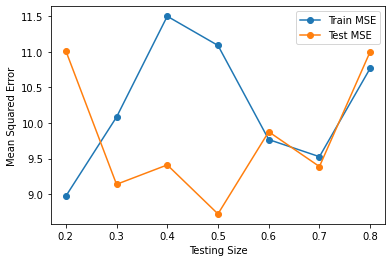

In [49]:
def linearRegressionDiffSize(ratio):
    feat_train, feat_test, label_train, label_test = train_test_split(features,labels,test_size=0.2)
    experiment1_lr = LinearRegression()
    feat_train  = np.array(feat_train)
    feat_test  = np.array(feat_test)
    label_train  = np.array(label_train)
    label_test  = np.array(label_test)
    exp1_training, weights = experiment1_lr.fit(feat_train, label_train) #Train model
    exp1_testing = exp1_training.predict(feat_test)
    exp1_train_expected = exp1_training.predict(feat_train)
    return experiment1_lr, mean_squared_error(label_test, exp1_testing), mean_squared_error(label_train, exp1_train_expected)

subset_20, mse_subset_20, mse_train_subset_20 = linearRegressionDiffSize(0.2)
subset_30, mse_subset_30, mse_train_subset_30 = linearRegressionDiffSize(0.3)
subset_40, mse_subset_40, mse_train_subset_40 = linearRegressionDiffSize(0.4)
subset_50, mse_subset_50, mse_train_subset_50 = linearRegressionDiffSize(0.5)
subset_60, mse_subset_60, mse_train_subset_60 = linearRegressionDiffSize(0.6)
subset_70, mse_subset_70, mse_train_subset_70 = linearRegressionDiffSize(0.7)
subset_80, mse_subset_80, mse_train_subset_80 = linearRegressionDiffSize(0.8)
print(mse_subset_20,mse_subset_30,mse_subset_40,mse_subset_50,mse_subset_60,mse_subset_70,mse_subset_80,"\n")
print(mse_train_subset_20,mse_train_subset_30,mse_train_subset_40,mse_train_subset_50,mse_train_subset_60,mse_train_subset_70,mse_train_subset_80)
# Define the training size and MSE values
test_sizes = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]
test_mse = [mse_subset_20,mse_subset_30,mse_subset_40,mse_subset_50,mse_subset_60,mse_subset_70,mse_subset_80]
train_mse = [mse_train_subset_20,mse_train_subset_30,mse_train_subset_40,mse_train_subset_50,mse_train_subset_60,mse_train_subset_70,mse_train_subset_80]
plt.plot(test_sizes, train_mse, 'o-', label='Train MSE')
plt.plot(test_sizes, test_mse, 'o-', label='Test MSE')
plt.xlabel('Testing Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# What would happen if we got rid of features that have almost no correlation?

In [41]:
new_df = df.copy().drop(columns=["X6", "X8"])
corr_features = new_df.copy()
corr_features = corr_features.drop(columns=["Y1", "Y2"])
corr_features = corr_features.to_numpy()


corr_labels = new_df.copy()
corr_labels = corr_labels.drop(columns=["X1", "X2", "X3", "X4", "X5", "X7"])
corr_labels = corr_labels.to_numpy()

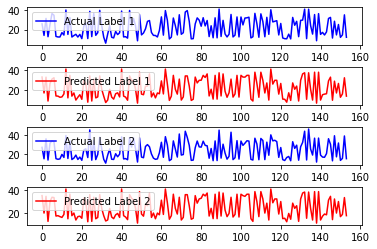

MSE for linear regression, testing set:
 12.132535650362732
MSE for linear regression, training set:
 12.893935487234153
MAE for linear regression, testing set:
 2.8073717915226557
MAE for linear regression, training set:
 2.8023665658686863
R^2 for linear regression, testing set:
 0.8745866658996686
R^2 for linear regression, training set:
 0.8677244295219132
Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.

Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.

W values 
 [[ 22.32063537  24.59064

In [42]:
feat_train, feat_test, label_train, label_test = train_test_split(corr_features,corr_labels,test_size=0.2)
experiment1_lr = LinearRegression()
feat_train  = np.array(feat_train)
feat_test  = np.array(feat_test)
label_train  = np.array(label_train)
label_test  = np.array(label_test)
exp1_training, weights = experiment1_lr.fit(feat_train, label_train) #Train model
exp1_testing = exp1_training.predict(feat_test)
exp1_train_expected = exp1_training.predict(feat_train)


#Second plot

plt.subplot(4, 1, 1)
plt.plot(label_test[:, 0], color='blue', label='Actual Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(label_test[:, 1], color='blue', label='Actual Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(exp1_testing[:, 0], color='red', label='Predicted Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(exp1_testing[:, 1], color='red', label='Predicted Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.show()
#TODO: four plots, two for each dependent variable
print("MSE for linear regression, testing set:\n", mean_squared_error(label_test, exp1_testing))
print("MSE for linear regression, training set:\n", mean_squared_error(label_train, exp1_train_expected))


print("MAE for linear regression, testing set:\n", mean_absolute_error(label_test, exp1_testing))
print("MAE for linear regression, training set:\n", mean_absolute_error(label_train, exp1_train_expected))


print("R^2 for linear regression, testing set:\n", r_squared(label_test, exp1_testing))
print("R^2 for linear regression, training set:\n", r_squared(label_train, exp1_train_expected))


print("Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.\n")
# print("Weights:\n",weights)
print("Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.\n")
print("W values \n", weights)
print("Importance list for dependent variable Y1:\n")

importance = sorted(zip(range(8), weights[:, 0]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()
print("Importance list for dependent variable Y2:\n")
importance = sorted(zip(range(8), weights[:, 1]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()


# Expirement 2: Can we do better with Non Linear Basis'

In [43]:
gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)          #non-linear feature function

guassian_features = features.copy()

D = 100
mu = np.linspace(0, 10, D) # some values for mu
D = mu.shape[0] # number of elements in mu

phi = np.zeros((guassian_features.shape[0], mu.shape[0]))
for i in range(guassian_features.shape[0]):
    for j in range(mu.shape[0]):
        for k in range(guassian_features.shape[1]):
            phi[i, j] += gaussian(guassian_features[i, k], mu[j], 1)

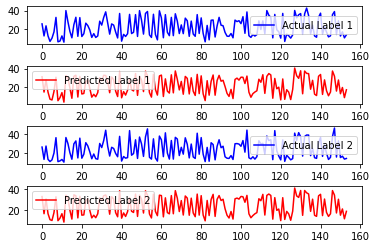

MSE for linear regression, testing set:
 11.007040873907094
MSE for linear regression, training set:
 10.010694842141298
MAE for linear regression, testing set:
 2.445554905651107
MAE for linear regression, training set:
 2.3561421255167363
R^2 for linear regression, testing set:
 0.8909297698702336
R^2 for linear regression, training set:
 0.8961063182596116
Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.

Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.

W values 
 [[ 22.25983709  24.524297

In [44]:

feat_train, feat_test, label_train, label_test = train_test_split(guassian_features,labels,test_size=0.2)
experiment1_lr = LinearRegression()
feat_train  = np.array(feat_train)
feat_test  = np.array(feat_test)
label_train  = np.array(label_train)
label_test  = np.array(label_test)
exp1_training, weights = experiment1_lr.fit(feat_train, label_train) #Train model
exp1_testing = exp1_training.predict(feat_test)
exp1_train_expected = exp1_training.predict(feat_train)


#Second plot

plt.subplot(4, 1, 1)
plt.plot(label_test[:, 0], color='blue', label='Actual Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(label_test[:, 1], color='blue', label='Actual Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(exp1_testing[:, 0], color='red', label='Predicted Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(exp1_testing[:, 1], color='red', label='Predicted Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.show()
#TODO: four plots, two for each dependent variable
print("MSE for linear regression, testing set:\n", mean_squared_error(label_test, exp1_testing))
print("MSE for linear regression, training set:\n", mean_squared_error(label_train, exp1_train_expected))


print("MAE for linear regression, testing set:\n", mean_absolute_error(label_test, exp1_testing))
print("MAE for linear regression, training set:\n", mean_absolute_error(label_train, exp1_train_expected))


print("R^2 for linear regression, testing set:\n", r_squared(label_test, exp1_testing))
print("R^2 for linear regression, training set:\n", r_squared(label_train, exp1_train_expected))


print("Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.\n")
# print("Weights:\n",weights)
print("Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.\n")
print("W values \n", weights)
print("Importance list for dependent variable Y1:\n")

importance = sorted(zip(range(8), weights[:, 0]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()
print("Importance list for dependent variable Y2:\n")
importance = sorted(zip(range(8), weights[:, 1]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()


In [45]:
sigmoid = lambda x,mu, s: 1/(1 + np.exp(-(x - mu)/s))

sigmoid_features = features.copy()

D = 15
mu = np.linspace(0, 10, D) # some values for mu
D = mu.shape[0] # number of elements in mu

phi = np.zeros((sigmoid_features.shape[0], mu.shape[0]))
for i in range(sigmoid_features.shape[0]):
    for j in range(mu.shape[0]):
        for k in range(sigmoid_features.shape[1]):
            phi[i, j] += sigmoid(sigmoid_features[i, k], mu[j], 1)

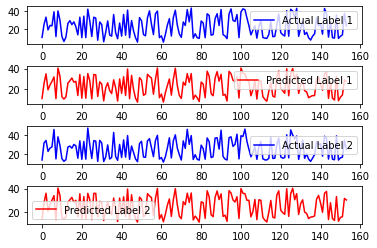

MSE for linear regression, testing set:
 11.358648991763154
MSE for linear regression, training set:
 10.669135762561474
MAE for linear regression, testing set:
 2.411718101608564
MAE for linear regression, training set:
 2.496669237935597
R^2 for linear regression, testing set:
 0.8996429689907113
R^2 for linear regression, training set:
 0.8854521510044057
Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.

Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.

W values 
 [[ 2.22357690e+01  2.45440

In [46]:
feat_train, feat_test, label_train, label_test = train_test_split(sigmoid_features,labels,test_size=0.2)
experiment1_lr = LinearRegression()
feat_train  = np.array(feat_train)
feat_test  = np.array(feat_test)
label_train  = np.array(label_train)
label_test  = np.array(label_test)
exp1_training, weights = experiment1_lr.fit(feat_train, label_train) #Train model
exp1_testing = exp1_training.predict(feat_test)
exp1_train_expected = exp1_training.predict(feat_train)


#Second plot

plt.subplot(4, 1, 1)
plt.plot(label_test[:, 0], color='blue', label='Actual Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(label_test[:, 1], color='blue', label='Actual Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(exp1_testing[:, 0], color='red', label='Predicted Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(exp1_testing[:, 1], color='red', label='Predicted Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.show()
#TODO: four plots, two for each dependent variable
print("MSE for linear regression, testing set:\n", mean_squared_error(label_test, exp1_testing))
print("MSE for linear regression, training set:\n", mean_squared_error(label_train, exp1_train_expected))


print("MAE for linear regression, testing set:\n", mean_absolute_error(label_test, exp1_testing))
print("MAE for linear regression, training set:\n", mean_absolute_error(label_train, exp1_train_expected))


print("R^2 for linear regression, testing set:\n", r_squared(label_test, exp1_testing))
print("R^2 for linear regression, training set:\n", r_squared(label_train, exp1_train_expected))


print("Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.\n")
# print("Weights:\n",weights)
print("Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.\n")
print("W values \n", weights)
print("Importance list for dependent variable Y1:\n")

importance = sorted(zip(range(8), weights[:, 0]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()
print("Importance list for dependent variable Y2:\n")
importance = sorted(zip(range(8), weights[:, 1]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()


In [65]:
class LinearRegression_sgd:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
            
    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([np.ones(N),x])
        N,D = x.shape
        def gradient(x, y, w):                          # define the gradient function
            yh =  x @ w
            N, D = x.shape
            ynew = yh - y
            grad = .5*np.dot(np.transpose(x), ynew)/N 
            return grad, mean_squared_error(y, yh)
        w0 = np.zeros((D,2))                     # initialize the weights to 0
        self.w, mse_list = optimizer.run(gradient, x, y, w0)      # run the optimizer to get the optimal weights
        return self, mse_list
    
    def predict(self, x):
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([np.ones(N),x])
        yh = x@self.w
        return yh

In [66]:
class GradientDescent:
    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False, batch_size = 1):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        self.batch_size = batch_size
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        total_samples = x.shape[0]
        mse_list = []
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            for i in range(0, total_samples, self.batch_size):
                mini_batch_x  = x[i: i+self.batch_size]
                mini_batch_y  = y[i: i+self.batch_size]
                grad, mse = gradient_fn(mini_batch_x, mini_batch_y, w)               # compute the gradient with present weight
                mse_list.append(mse)
                self.w_history.append(w)
                w = w - self.learning_rate * grad         # weight update step
                if self.record_history:
                    self.w_history.append(w)
                t += 1
        return w, mse_list

mse for batch 8  : 10.454711450992065
mse for batch 16  : 10.240407082156999
mse for batch 32  : 9.84880788034508
mse for batch 64  : 9.532809658369883
mse for batch 128  : 9.392674176731452


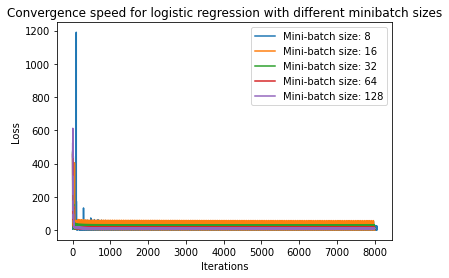

In [68]:
# def growing_mini_batches(size):
#     optimizer = GradientDescent(learning_rate=.1, max_iters=10000, record_history=True, batch_size=size)
#     # labels  = np.array(labels)
#     # features  = np.array(features)
#     m = LinearRegression_sgd()
#     train = m.fit(features,labels,optimizer)
#     yh =  train.predict(features)
#     return mean_squared_error(labels, yh)

# print(growing_mini_batches(8))
# print(growing_mini_batches(16))
# print(growing_mini_batches(32))
# print(growing_mini_batches(64))
# print(growing_mini_batches(128))

def growing_mini_batches(size):
    optimizer = GradientDescent(learning_rate=0.1, max_iters=8000, record_history=True, batch_size=size)
    # labels  = np.array(labels)
    # features  = np.array(features)
    m = LinearRegression_sgd()
    train,loss = m.fit(features,labels,optimizer)
    yh =  train.predict(features)
    return mean_squared_error(labels, yh), loss

losses = []
mini_batch_size = [8,16,32,64,128]
x = -1
for i in mini_batch_size:
    x = x + 1
    mse, loss = growing_mini_batches(i)
    losses.append(loss)
    print("mse for batch",mini_batch_size[x]," :", mse)
for i, losses in enumerate(losses):
    filtered_loss_list = [loss for loss in losses if loss <= 10000000]
    iterations = range(len(filtered_loss_list))
    plt.plot(iterations, filtered_loss_list, label=f'Mini-batch size: {mini_batch_size[i]}')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Convergence speed for logistic regression with different minibatch sizes')
plt.legend()
plt.show()

In [70]:
def different_learning_rates(rate):
    X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2)
    optimizer = GradientDescent(learning_rate=rate, max_iters=100, record_history=True, batch_size=8)
    # labels  = np.array(labels)
    # features  = np.array(features)
    m = LinearRegression_sgd()
    train, loss = m.fit(X_train,y_train,optimizer)
    yh =  train.predict(X_test)
    return mean_squared_error(y_test, yh)
print(different_learning_rates(0.01))
print(different_learning_rates(0.5))
print(different_learning_rates(1))

136.5257852693501
13.480143751083228
21.987798446139923
